# Facial Key Point Detecting by Keras
## This example is running on Tensorflow backend.
### not good performance. Training time is so big..

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD

Using TensorFlow backend.


In [2]:
TRAIN_PATH = './training.csv'
TEST_PATH = './test.csv'

def load_data(is_test=False, cols=None):
    """
    기본적으로는 Training 데이터를 로드하되, 테스트 데이터를 로드할 경우에는 is_test 옵션을 준다
    기본적으로 Image 칼럼만 가져오는데, 원하는 칼럼의 경우 cols 에 리스트를 넘긴다
    """
    file_path = TEST_PATH if is_test else TRAIN_PATH
    df = pd.read_csv(file_path)
    # print(df.info())
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))
    
    if cols:
        # 만약 더 담을 칼럼이 있다면, 추가해준다
        df = df[list(cols)+['Image']]
    # print(df.count()) # print the number of values for each columns
    df.dropna(inplace=True)
    
    X = np.vstack(df['Image'].values) / 255 # scale pixel values to [0, 1]
    X = X.astype(np.float32)
    
    if not is_test:
        # only training data processing
        y = df[df.columns[:-1]].values
        y = (y-48)/48 # scale target coordinates to [-1, 1]
        X, y = shuffle(X, y, random_state=42) # shuffle train data
        y = y.astype(np.float32)
    else:
        y = None
    return X, y

In [3]:
def load_2d_shape(is_test=False, cols=None):
    X, y = load_data(is_test=is_test)
    print("X.shape from load_data ", X.shape)
    X = X.reshape(-1, 1, 96, 96)
    print("X.shape from reshape ", X.shape)
    return X, y

In [4]:
def plot_sample(x, y, axis):
    img = x.reshape(96,96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2]*48 + 48, y[1::2]*48 + 48, marker='x', s=10)
    axis.axis('off')

def draw_multi_plot(X, y, row_num=4, col_num=4, fig_size=(15,10)):
    fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=fig_size)
    i=0
    for row in axes:
        for each_ax in row:
            plot_sample(X[i], y[i], each_ax)
            i += 1
    plt.tight_layout()

In [5]:
model = Sequential()
model

In [6]:
model.add(Convolution2D(32, 3, 3, input_shape=(1, 96, 96), name='conv1'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Convolution2D(64, 2, 2, name='conv2'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Convolution2D(128, 2, 2, name='conv3'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(30))

In [7]:
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
X, y = load_2d_shape()

X.shape from load_data  (2140, 9216)
X.shape from reshape  (2140, 1, 96, 96)


In [9]:
model.fit(X, y, batch_size=128, nb_epoch=3, verbose=1)

Epoch 1/3
2140/2140 [==============================] - 148s - loss: 0.0928 - acc: 0.1234   
Epoch 2/3
2140/2140 [==============================] - 145s - loss: 0.0257 - acc: 0.4505   
Epoch 3/3
2140/2140 [==============================] - 134s - loss: 0.0183 - acc: 0.5033   


In [10]:
y_pred = model.predict(X)
y_pred

array([[ 0.2194109 , -0.08981828, -0.15039517, ...,  0.26796454,
        -0.02826436,  0.39729184],
       [ 0.24020533, -0.09275484, -0.16874449, ...,  0.30667943,
        -0.02384805,  0.44625425],
       [ 0.23365414, -0.10098542, -0.15495108, ...,  0.28896552,
        -0.02905615,  0.42562041],
       ..., 
       [ 0.2306779 , -0.09636045, -0.16304268, ...,  0.28934115,
        -0.02292582,  0.43691081],
       [ 0.23144528, -0.0894834 , -0.16901132, ...,  0.29386058,
        -0.03419957,  0.45088911],
       [ 0.2200295 , -0.09269913, -0.15491989, ...,  0.27561563,
        -0.0318339 ,  0.41211569]], dtype=float32)

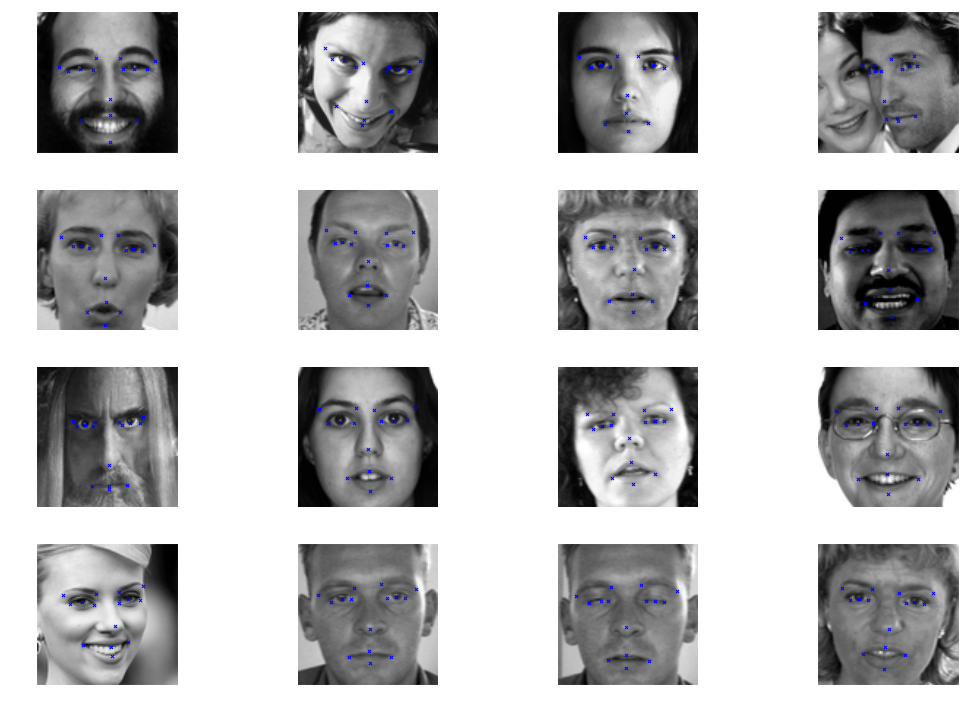

In [11]:
draw_multi_plot(X, y)

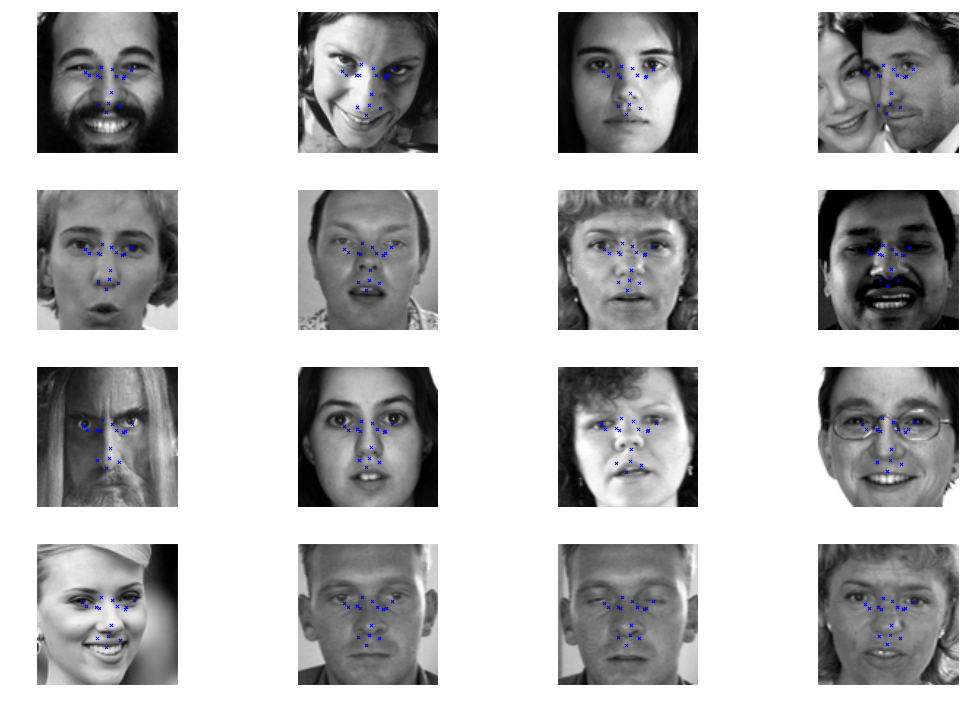

In [12]:
draw_multi_plot(X, y_pred)